In [1]:
# !unzip ./data.zip

In [2]:
!nvidia-smi

Wed Apr  7 23:15:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.39       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Graphics Device     Off  | 00000000:26:00.0  On |                  N/A |
|  0%   54C    P2    35W / 170W |    738MiB / 12045MiB |     10%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session =tf.compat.v1.InteractiveSession(config=config)
gpu = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

# Become one with the data

In [4]:
import random,os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
paths_walkthrough = ['Airbnb Data']
for path_walkthrough in paths_walkthrough:
  print('\n'*5)
  print('*-*'*50)
  print(path_walkthrough)
  print('*-*'*50)
  print('\n'*5)
  for (root,dirs,files) in os.walk(path_walkthrough): 
    print('-'*50)
    print(f'Root : {root}')
    print(f'Dirs : {dirs}')
    print(f'No of Imgs : {len(files)}')
    print('-'*50)







*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Airbnb Data
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*






--------------------------------------------------
Root : Airbnb Data
Dirs : ['Training Data']
No of Imgs : 0
--------------------------------------------------
--------------------------------------------------
Root : Airbnb Data/Training Data
Dirs : ['staircase', 'bedroom', 'bathroom', 'kitchen', 'house-exterior', 'outdoor', 'living-room', 'decor', 'tv-room', 'basement', 'backyard', 'dining-room', 'entrance']
No of Imgs : 0
--------------------------------------------------
--------------------------------------------------
Root : Airbnb Data/Training Data/staircase
Dirs : []
No of Imgs : 2
--------------------------------------------------
-----------------------

How many imgs ? ... 



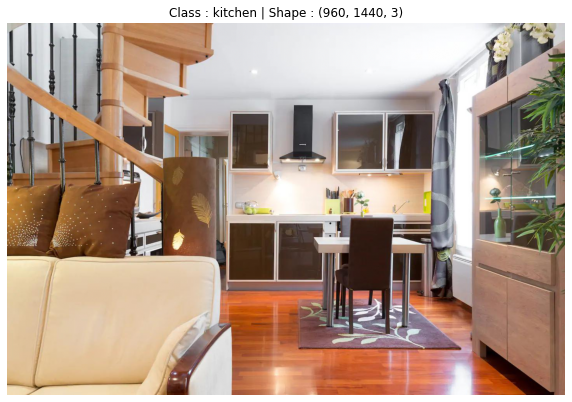

In [6]:
try:
  how_many_imgs = int(input('How many imgs ? ... \n'))
except:
  how_many_imgs = 1
for _ in range(how_many_imgs):
  train_or_test = 'Training Data'
  class_name = random.choice(os.listdir('./Airbnb Data/Training Data'))
  random_image = random.choice(os.listdir(f'./Airbnb Data/{train_or_test}/{class_name}'))
  PATH = f'./Airbnb Data/{train_or_test}/{class_name}/{random_image}'
  img = mpimg.imread(PATH)
  img = img / 255.0
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.axis(False)
  plt.title(f'Class : {class_name} | Shape : {img.shape}')
  plt.show();

# Load the data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,validation_split=0.75)
train_data_small = datagen.flow_from_directory('./Airbnb Data/Training Data',target_size=(224,224),subset='training')
test_data = datagen.flow_from_directory('./Airbnb Data/Training Data',target_size=(224,224),subset='validation')

Found 221 images belonging to 13 classes.
Found 643 images belonging to 13 classes.


# Modelling

In [9]:
import wandb
from wandb.keras import WandbCallback
import tensorflow_hub as hub
PROJECT_NAME = "House-Part-Detection"

## CNN (Custom) vs Transfer Learning (resnet50) vs Classification

### Classification

In [10]:
# wandb.init(project=PROJECT_NAME,name='classification-baseline')
# model = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(224,224,3)),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(len(os.listdir('./Airbnb Data/Training Data')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=25,callbacks=[WandbCallback()])

### CNN (Custom)

In [11]:
# wandb.init(project=PROJECT_NAME,name='cnn-baseline')
# model = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(len(os.listdir('./Airbnb Data/Training Data')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=25,callbacks=[WandbCallback()])

### Transfer Learning (resnet50)

In [12]:
# model_url = "https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"
# wandb.init(project=PROJECT_NAME,name='transfer-learning-baseline')
# model = tf.keras.Sequential([
#   hub.KerasLayer(model_url,input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./Airbnb Data/Training Data')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=25,callbacks=[WandbCallback()])

**Transfer Learning Won !**

# What is the best transfer learning family for the project

In [13]:
models_to_try = [
    # ['resnet50','https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'],
    # ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4'],
    # ['resnet_v1_50','https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4'],
    # ['resnet_v1_101','https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4'],
    ['inception_v3','https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'],
    ['mobilenet_v3_large_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5'],
    ['mobilenet_v3_small_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5'],
    ['efficentnetb0','https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'],
]

In [14]:
# for model_to_try in models_to_try:
#   try:
#     print('-'*100)
#     print(model_to_try)
#     print('-'*100)
#     wandb.init(project=PROJECT_NAME,name=f"{model_to_try[0]}-f")
#     model = tf.keras.Sequential([
#       hub.KerasLayer(model_to_try[1],input_shape=(224,224,3),trainable=False),
#       tf.keras.layers.Dense(len(os.listdir('./Airbnb Data/Training Data')),activation='softmax')
#     ])
#     model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
#     model.fit(train_data_small,validation_data=(test_data),epochs=25,callbacks=[WandbCallback(save_model=False)])
#     wandb.finish()
#   except:
#     print('-'*100)
#     print('Didnt work')
#     print(model_to_try)
#     print('Didnt work')
#     print('-'*100)

efficentnetb0 vs mobilenet_v3_small_100_224 vs resnet50

In [15]:
datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,validation_split=0.25)
train_data = datagen.flow_from_directory('./Airbnb Data/Training Data',target_size=(224,224),subset='training')
test_data = datagen.flow_from_directory('./Airbnb Data/Training Data',target_size=(224,224),subset='validation')

Found 654 images belonging to 13 classes.
Found 210 images belonging to 13 classes.


In [16]:
# wandb.init(project=PROJECT_NAME,name='resnet50')
# model = tf.keras.Sequential([
#   hub.KerasLayer('https://tfhub.dev/tensorflow/resnet_50/feature_vector/1',input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./Airbnb Data/Training Data')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=50,callbacks=[WandbCallback()])

In [17]:
# wandb.init(project=PROJECT_NAME,name='mobilenet_v3_small_100_224')
# model = tf.keras.Sequential([
#   hub.KerasLayer('https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5',input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./Airbnb Data/Training Data')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=50,callbacks=[WandbCallback()])

In [18]:
# wandb.init(project=PROJECT_NAME,name='efficentnetb0')
# model = tf.keras.Sequential([
#   hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1',input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./Airbnb Data/Training Data')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=50,callbacks=[WandbCallback()])

In [19]:
datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,validation_split=0.75)
train_data_small = datagen.flow_from_directory('./Airbnb Data/Training Data',target_size=(224,224),subset='training')
test_data = datagen.flow_from_directory('./Airbnb Data/Training Data',target_size=(224,224),subset='validation')

Found 221 images belonging to 13 classes.
Found 643 images belonging to 13 classes.


resnet family won !!

In [20]:
models_to_try = [
  # ['resnet_v2_50','https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4'],
  # ['resnet_50','https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'],
  # ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4'],
  # ['resnet_v1_50','https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4'],
  # ['resnet_v1_152','https://tfhub.dev/google/imagenet/resnet_v1_152/feature_vector/4'],
  # ['resnet_v2_101','https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/4'],
  # ['resnet_v1_101','https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4'],
]

In [21]:
# for model_to_try in models_to_try:
#   try:
#     print('-'*100)
#     print(model_to_try)
#     print('-'*100)
#     wandb.init(project=PROJECT_NAME,name=f"{model_to_try[0]}-resnet")
#     model = tf.keras.Sequential([
#       hub.KerasLayer(model_to_try[1],input_shape=(224,224,3),trainable=False),
#       tf.keras.layers.Dense(len(os.listdir('./Airbnb Data/Training Data')),activation='softmax')
#     ])
#     model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
#     model.fit(train_data_small,validation_data=(test_data),epochs=25,callbacks=[WandbCallback(save_model=False)])
#     wandb.finish()
#   except:
#     print('-'*100)
#     print('Didnt work')
#     print(model_to_try)
#     print('Didnt work')
#     print('-'*100)

In [22]:
datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,validation_split=0.25)
train_data = datagen.flow_from_directory('./Airbnb Data/Training Data',target_size=(224,224),subset='training')
test_data = datagen.flow_from_directory('./Airbnb Data/Training Data',target_size=(224,224),subset='validation')

Found 654 images belonging to 13 classes.
Found 210 images belonging to 13 classes.


In [23]:
# import shutil
# shutil.rmtree('./Airbnb Data/Training Data/.ipynb_checkpoints')

In [24]:
# model_url = "https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"
# wandb.init(project=PROJECT_NAME,name='big-dog-model')
# model = tf.keras.Sequential([
#   hub.KerasLayer(model_url,input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./Airbnb Data/Training Data')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=100,callbacks=[WandbCallback(),tf.keras.callbacks.EarlyStopping(patience=5)])
# model.save('./model-0.h5')

In [26]:
model = tf.keras.models.load_model('./model-0.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [37]:
class_names = ['backyard','basement','bathroom','bedroom','decor','dining-room','entrance','house-exterior','kitchen','living-room','outdoor','staircase','tv-room']

In [41]:
test_imgs = os.listdir("./test/")

In [42]:
from keras_preprocessing import image
import numpy as np

In [ ]:
for test_img in test_imgs:
  img = image.load_img(f"./test/{test_img}", target_size=(224, 224))
  print('-')
  img = image.img_to_array(img)
  print('-')
  img = img / 255.0
  print('-')
  preds = model.predict(np.expand_dims(img, axis=0))
  print('-')
  print(preds)
  print('-')
  plt.figure(figsize=(10,7))
  print('-')
  plt.imshow(img)
  print('-')
  # plt.title(f'{class_names[tf.round(preds)]}')
  plt.title(f'{class_names[tf.argmax(tf.squeeze(preds))]}')
  print('-')
  plt.axis(False)
  print('-')
  plt.show();